# TEMPERATURE PREDICTION USING AIR QUALITY DATA

## NAME : KRISHNARJUN.K.G
## ORGANIZATION : ENTRI ELEVATE
## BATCH :D14
## DATE: 00/00/2024



# INTRODUCTION

 * Objective: "The goal of this project is to accurately predict temperature based on air quality indicators such as CO, NO2, PM10, and other
              Enviornmental Factors."
              
 * Importance: Discuss why temperature prediction is crucial, for example, in environmental monitoring, public health, and climate change studies.
  
 * Scope: "This project focuses on analyzing historical air quality data and developing predictive models for future temperature trends."

In [3]:
 # data source "kaggle"

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset

data = pd.read_csv("global_air_quality_data_10000.csv")
data

City       Country        Date   PM2.5    PM10    NO2    SO2  \
0            Bangkok      Thailand  2023-03-19   86.57   25.19  99.88  30.63   
1           Istanbul        Turkey  2023-02-16   50.63   97.39  48.14   8.71   
2     Rio de Janeiro        Brazil  2023-11-13  130.21   57.22  98.51   9.92   
3             Mumbai         India  2023-03-16  119.70  130.52  10.96  33.03   
4              Paris        France  2023-04-04   55.20   36.62  76.85  21.85   
...              ...           ...         ...     ...     ...    ...    ...   
9995    Johannesburg  South Africa  2023-09-16  147.85  184.34  90.33  34.93   
9996          Berlin       Germany  2023-12-05   12.22  121.49  49.04   5.66   
9997          Moscow        Russia  2023-11-26   44.07  143.62   8.41  32.58   
9998          Berlin       Germany  2023-02-03   67.43   96.79  43.23  29.19   
9999         Bangkok      Thailand  2023-06-13   16.34   28.80  50.48  21.20   

        CO      O3  Temperature  Humidity  Wind Speed  
0     4.46   36.29        17.67     59.35       13.76  
1     3.40  144.16         3.46     67.51        6.36  
2     0.12  179.31        25.29     29.30       12.87  
3     7.74   38.65        23.15     99.97        7.71  
4     2.00   67.09        16.02     90.28       14.16  
...    ...     ...          ...       ...         ...  
9995  2.81  191.45        -1.92     65.22       15.48  
9996  2.10  184.56        -9.81     12.16       10.75  
9997  0.69  167.68        39.35     53.95        4.56  
9998  6.01  148.50        26.21     58.54        2.71  
9999  0.49   17.41         2.50     66.05        5.01  

[10000 rows x 12 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


In [22]:
data.describe()

PM2.5          PM10           NO2           SO2            CO  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      77.448439    104.438161     52.198649     25.344490      5.047984   
std       41.927871     55.062396     27.320490     14.091194      2.852625   
min        5.020000     10.000000      5.010000      1.000000      0.100000   
25%       41.185000     57.137500     28.347500     13.190000      2.560000   
50%       77.725000    103.690000     52.100000     25.350000      5.090000   
75%      113.392500    152.265000     75.705000     37.500000      7.480000   
max      149.980000    200.000000    100.000000     49.990000     10.000000   

                 O3  Temperature      Humidity    Wind Speed  
count  10000.000000  10000.00000  10000.000000  10000.000000  
mean     106.031643     14.89715     55.078579     10.231636  
std       55.081345     14.44380     25.982232      5.632628  
min       10.040000    -10.00000     10.010000      0.500000  
25%       58.380000      2.25750     32.527500      5.290000  
50%      106.055000     14.75500     55.080000     10.260000  
75%      153.982500     27.38250     77.442500     15.070000  
max      200.000000     40.00000     99.990000     20.000000

In [23]:
# checking missing values

print(data.isnull().sum())

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64


In [24]:
#data types
print(data.dtypes)

City            object
Country         object
Date            object
PM2.5          float64
PM10           float64
NO2            float64
SO2            float64
CO             float64
O3             float64
Temperature    float64
Humidity       float64
Wind Speed     float64
dtype: object


## skewness

In [25]:
import pandas as pd
import numpy as np


# Select numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns

# Calculate skewness
skewness = data[numerical_features].skew()

# Display skewness
print("Skewness of Numerical Features:\n", skewness)


Skewness of Numerical Features:
 PM2.5         -0.005624
PM10           0.011103
NO2           -0.001779
SO2            0.007406
CO            -0.002403
O3            -0.014037
Temperature    0.013261
Humidity      -0.005847
Wind Speed    -0.008010
dtype: float64


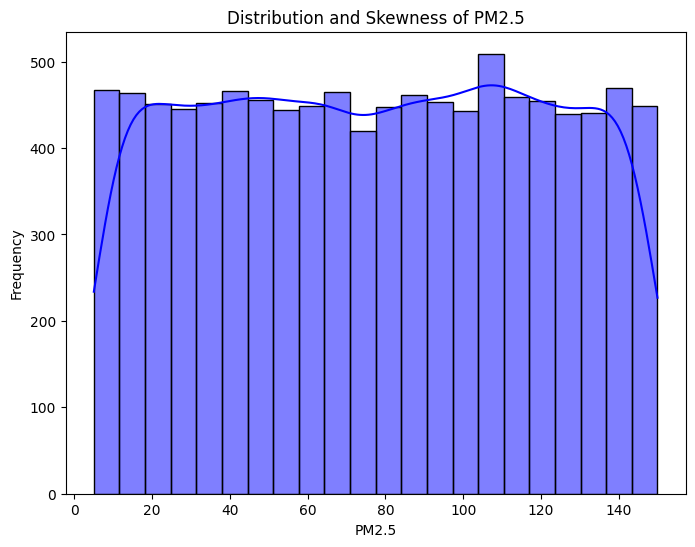

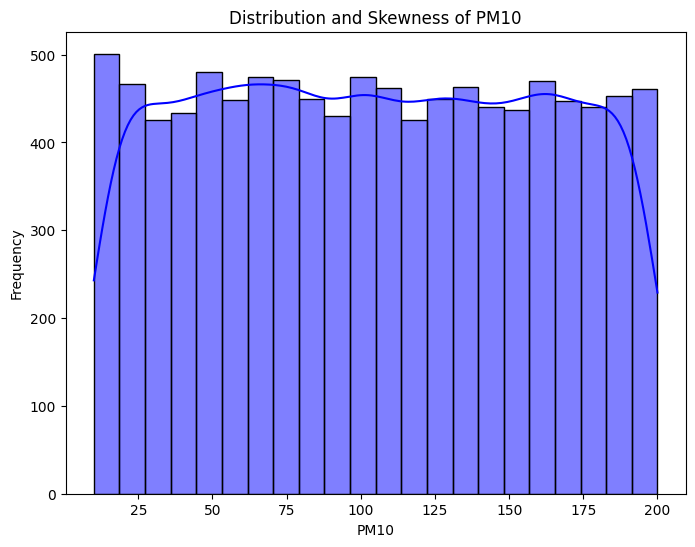

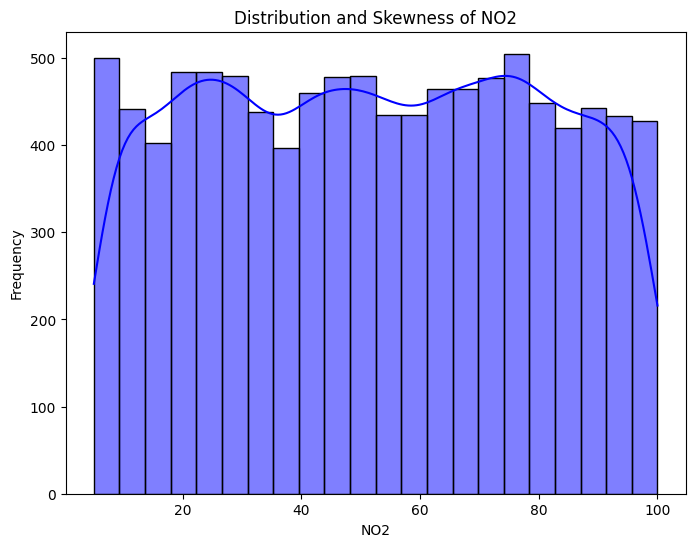

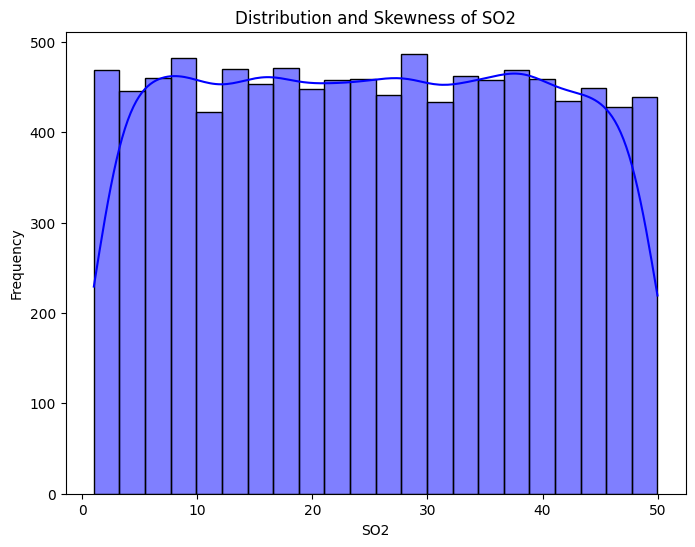

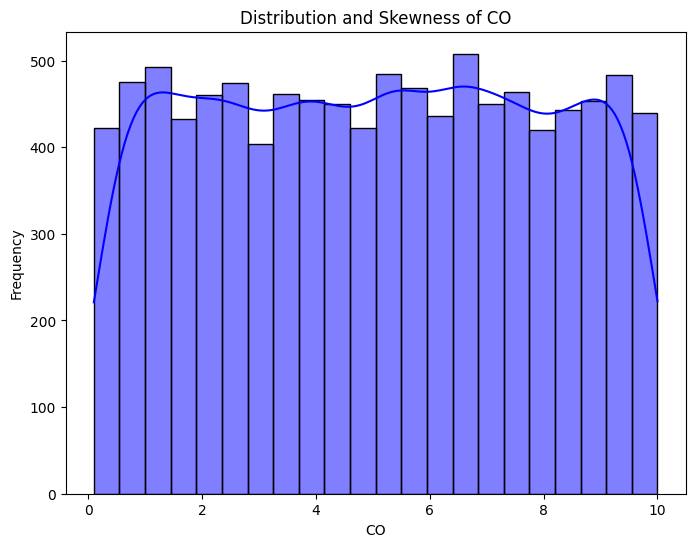

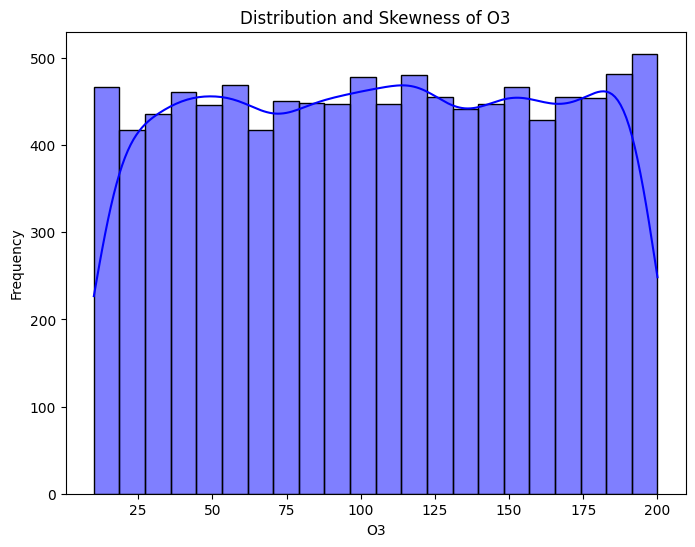

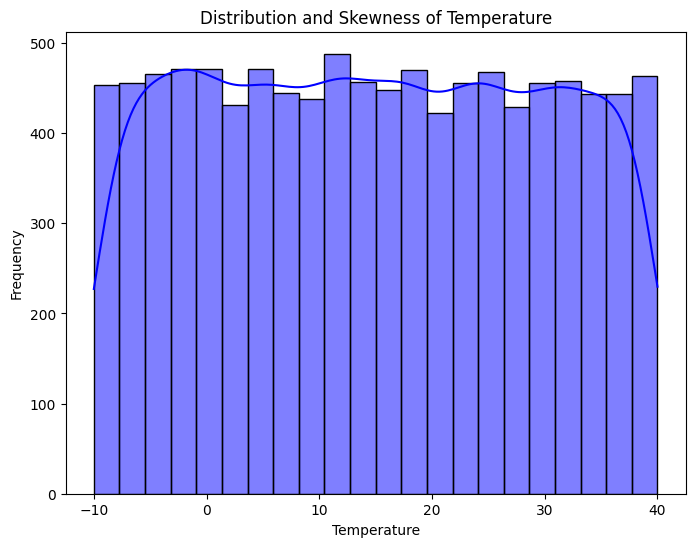

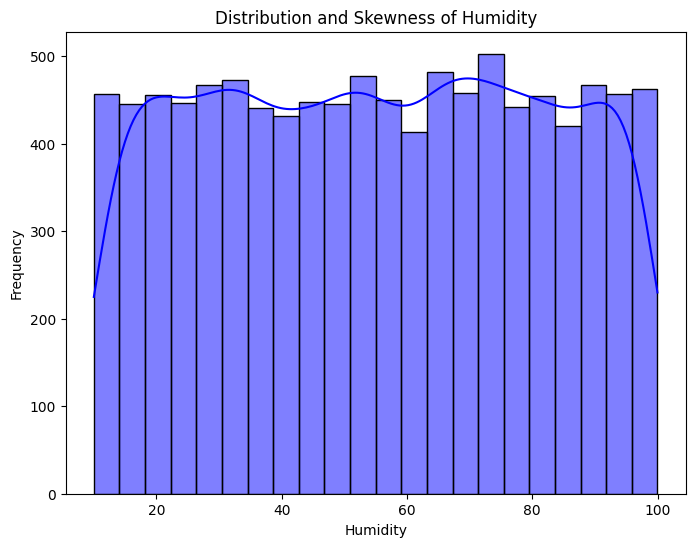

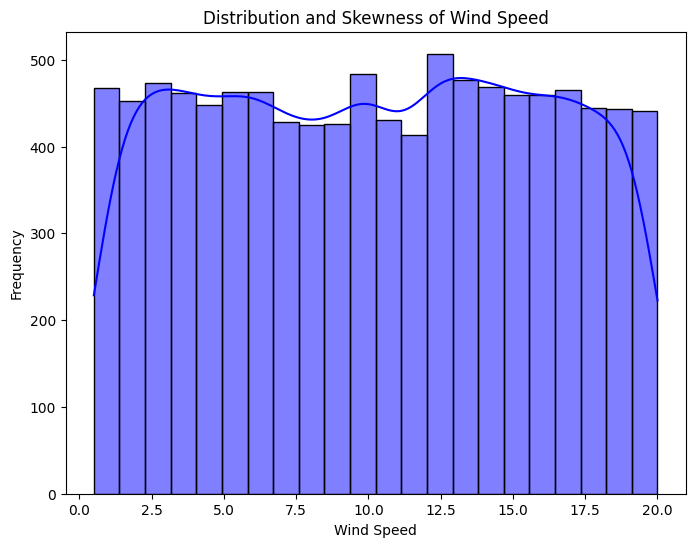

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms to visualize skewness

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f'Distribution and Skewness of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [27]:
# Select air quality features and categorical features

air_quality_features = ['CO', 'NO2', 'PM10', 'PM2.5', 'O3', 'SO2']
target_variable = 'Temperature'



In [28]:
# Handle missing values

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data[air_quality_features + [target_variable]]), 
                            columns=air_quality_features + [target_variable])

# Handle skewness

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
data_transformed = pd.DataFrame(pt.fit_transform(data_imputed), columns=data_imputed.columns)

## exploratory data analysis (EDA)

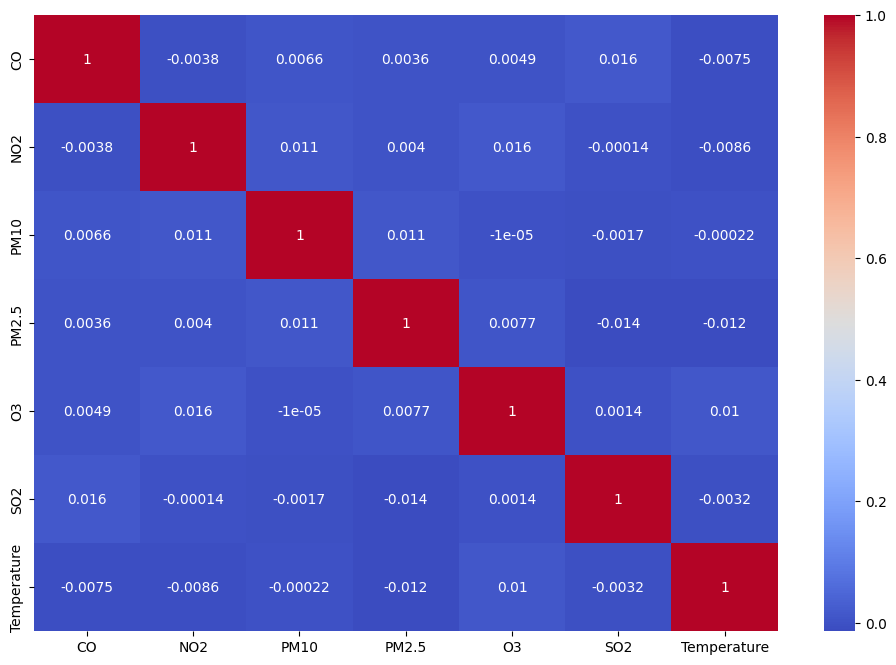

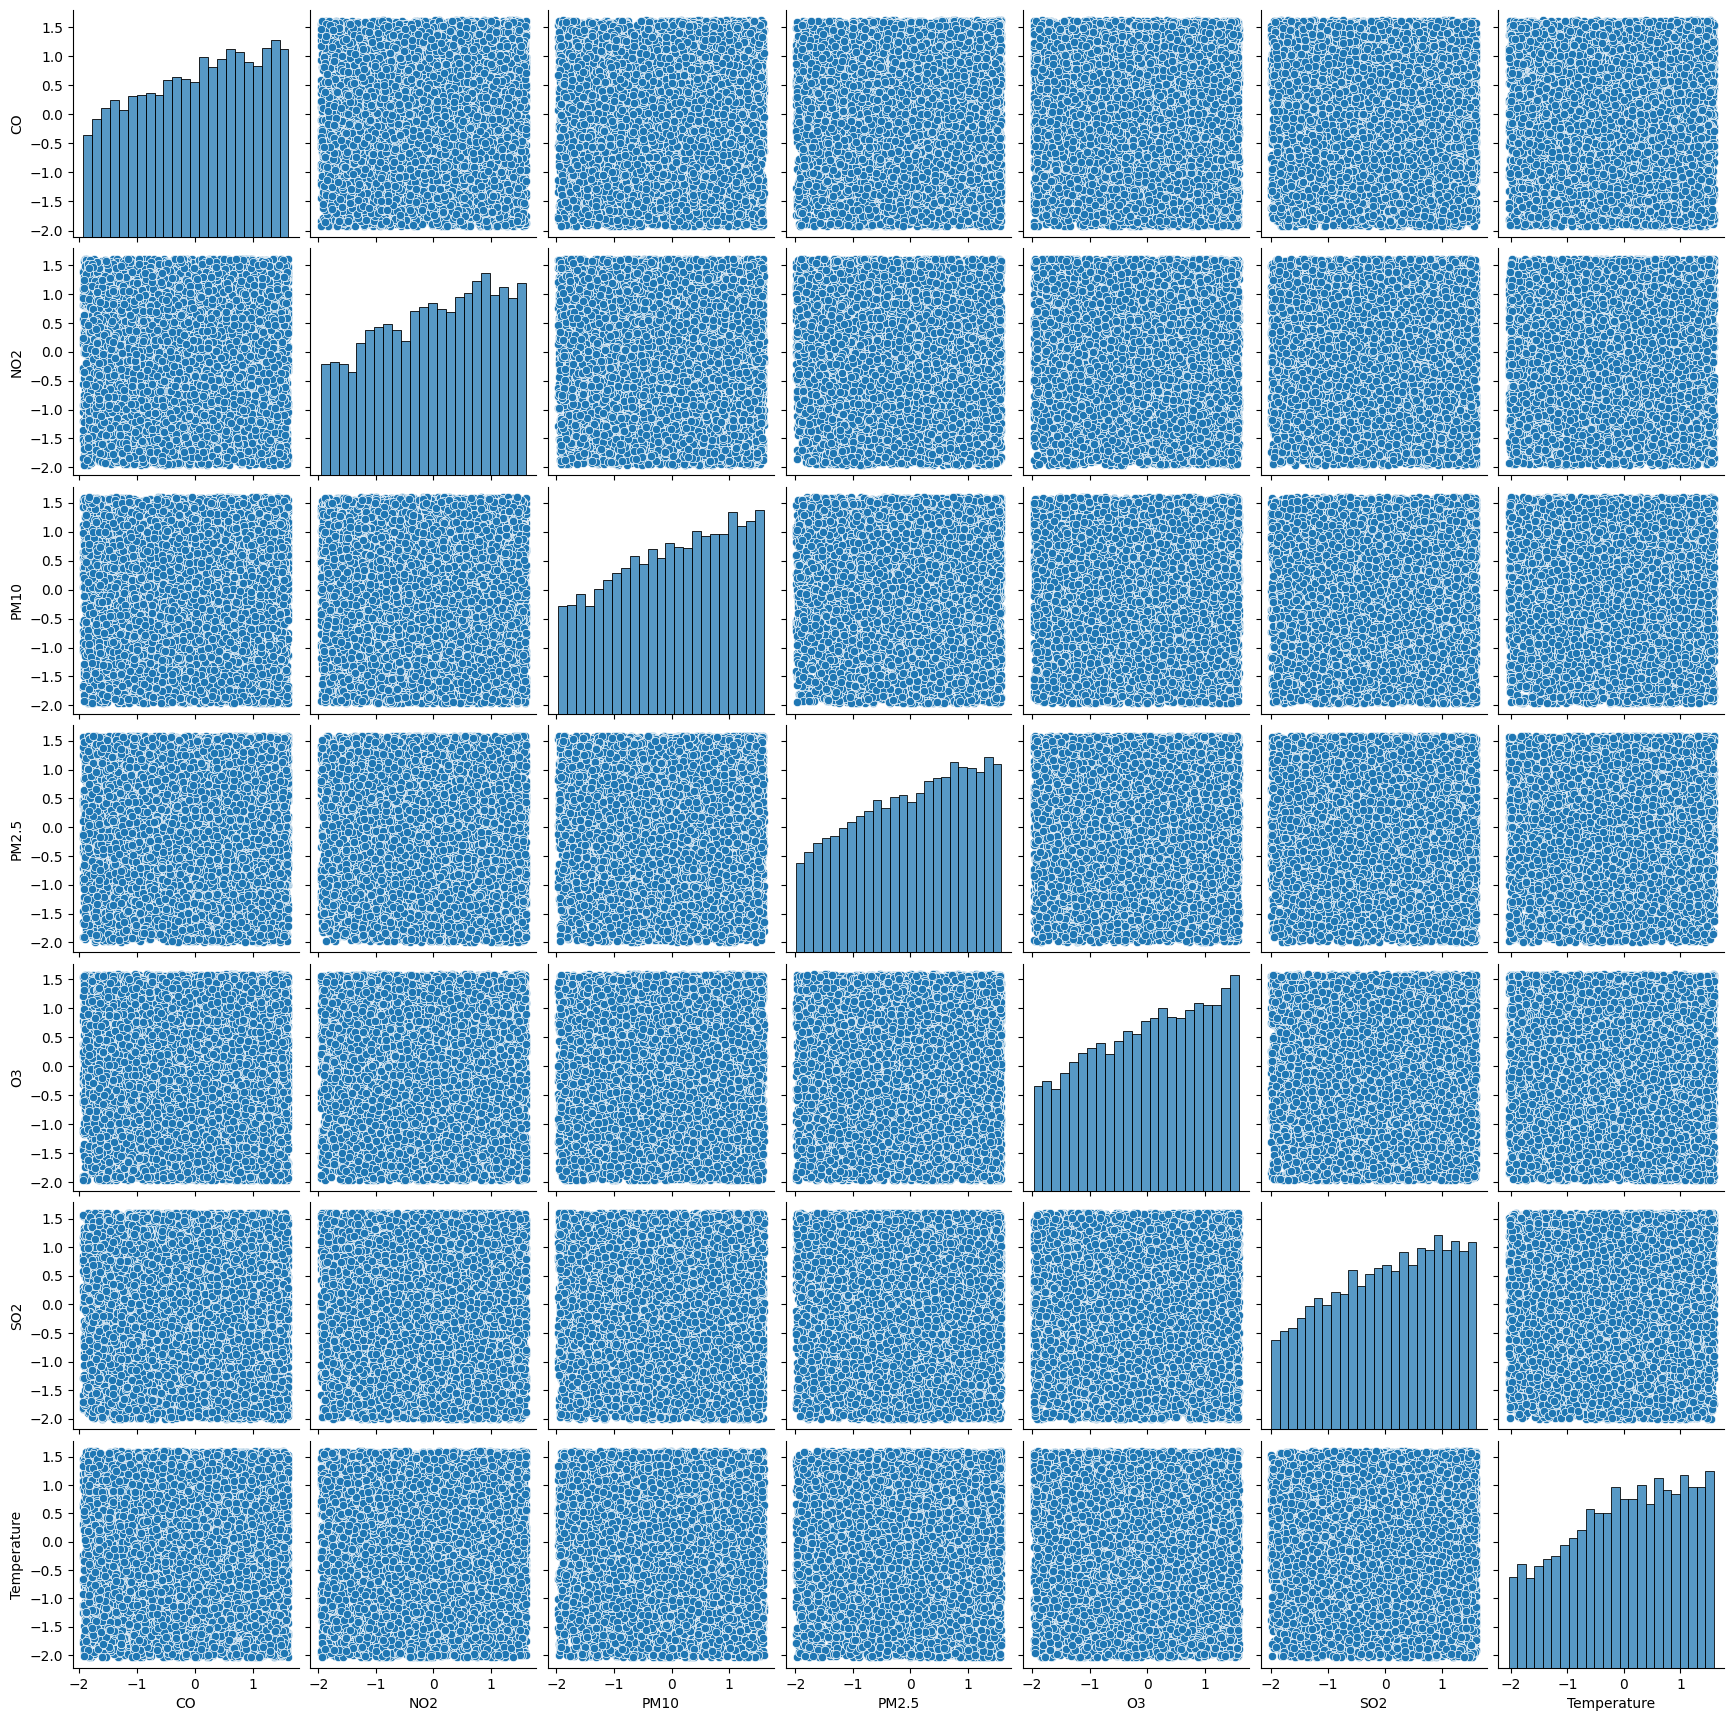

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data_transformed.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot to visualize relationships

sns.pairplot(data_transformed)
plt.show()




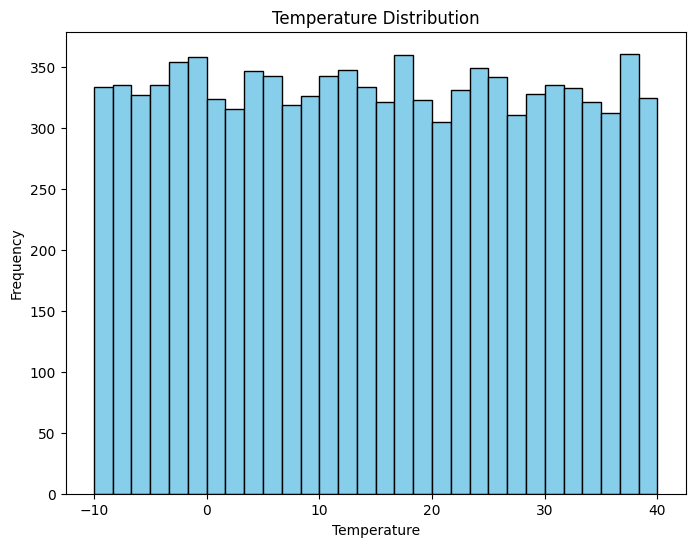

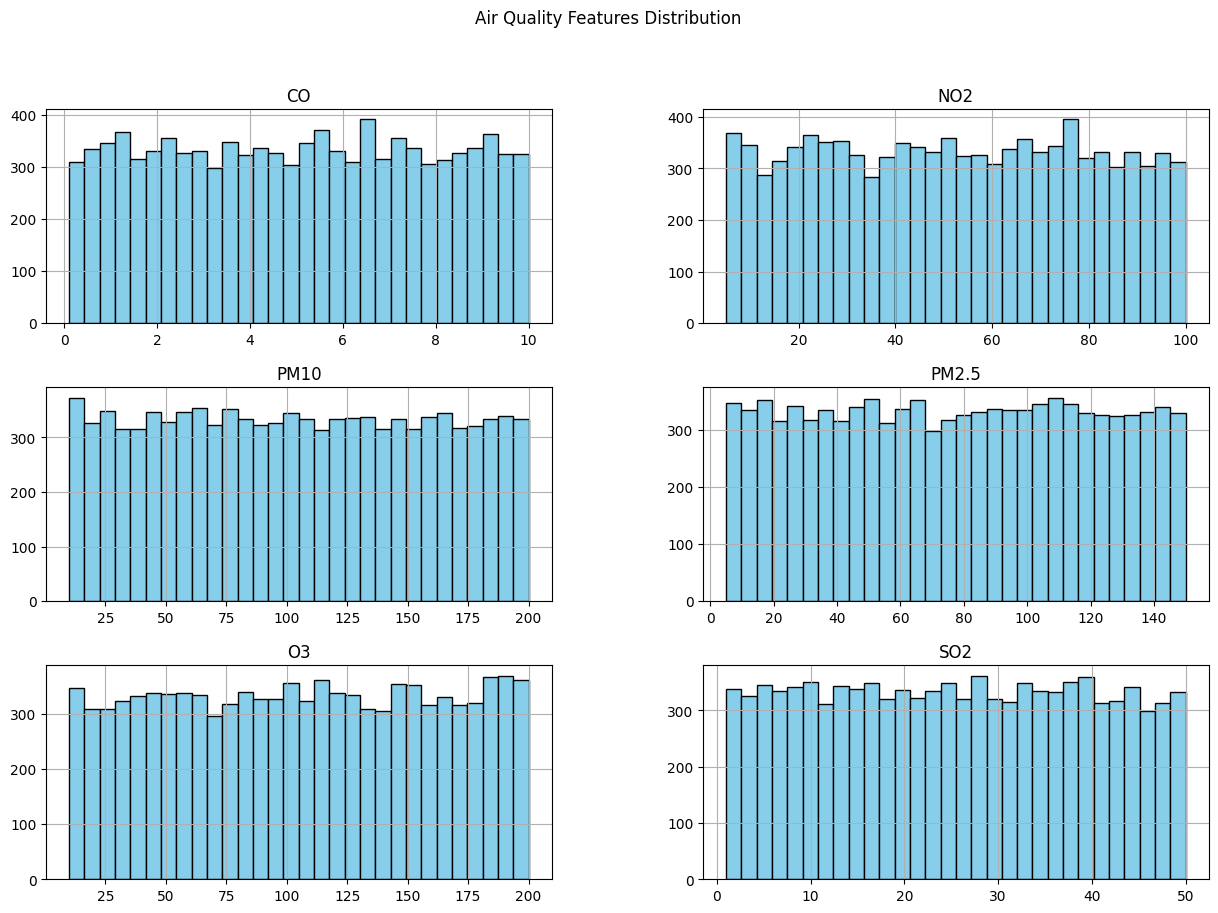

In [30]:
import matplotlib.pyplot as plt

# Histogram for Temperature

plt.figure(figsize=(8, 6))
plt.hist(data['Temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Histograms for Air Quality Features

data[air_quality_features].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Air Quality Features Distribution')
plt.show()


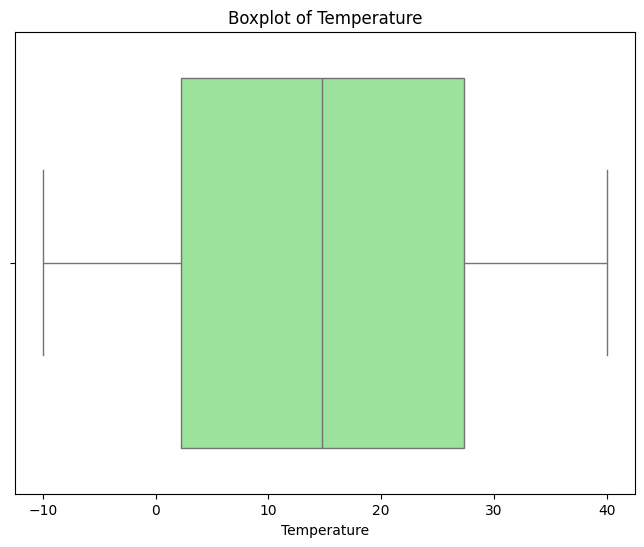

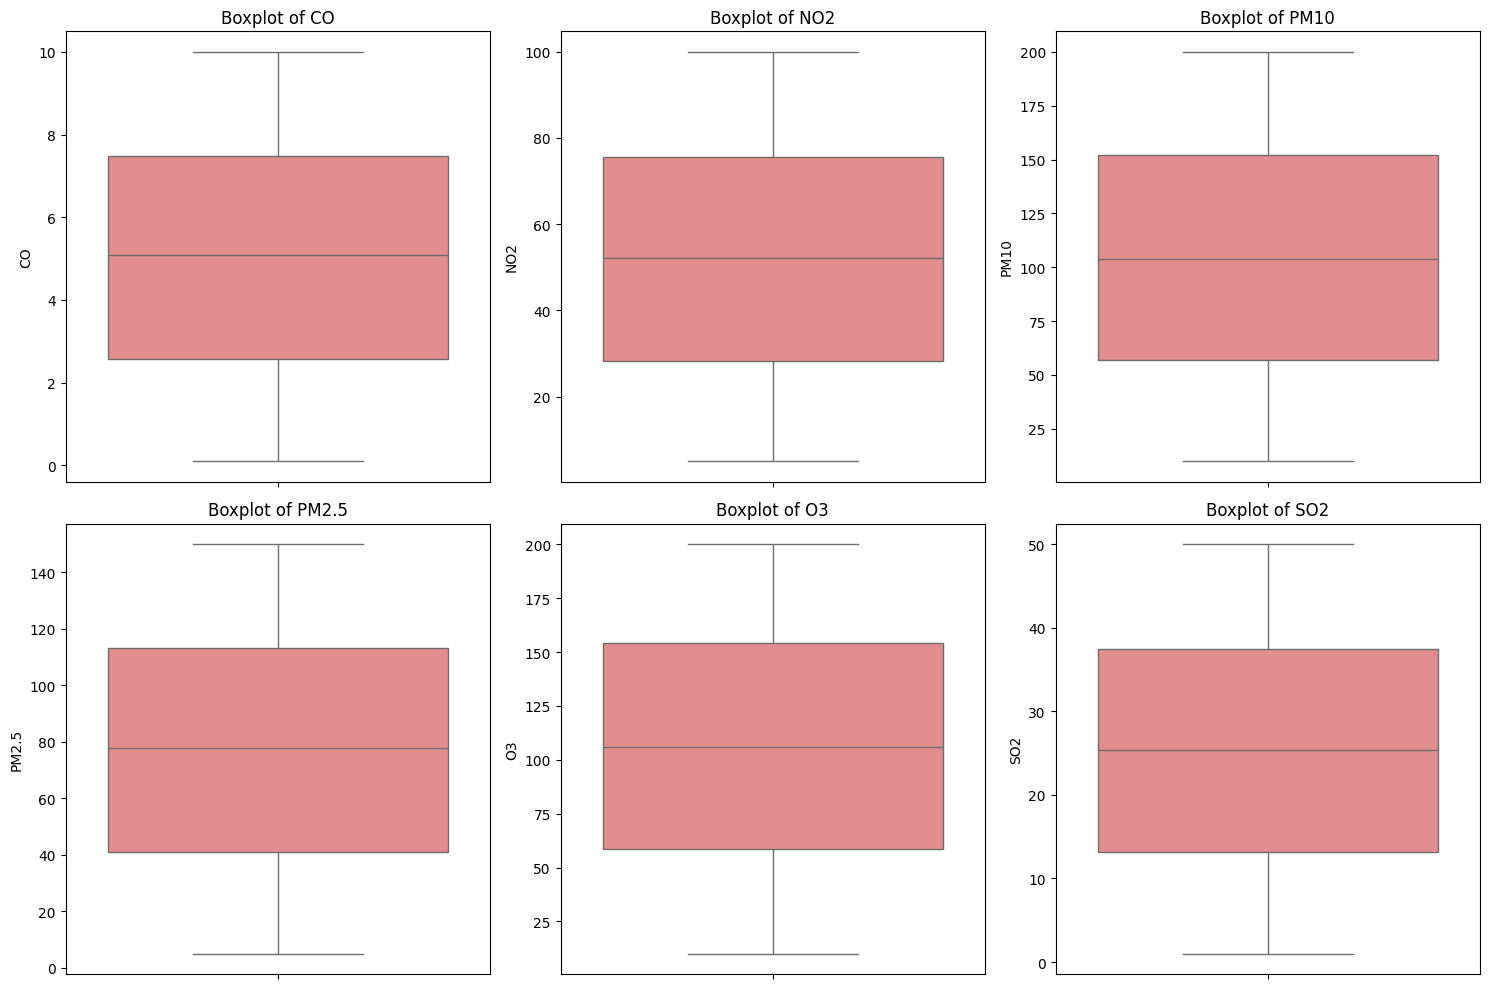

In [31]:
# Boxplot for Temperature

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Temperature'], color='lightgreen')
plt.title('Boxplot of Temperature')
plt.show()

# Boxplots for Air Quality Features

plt.figure(figsize=(15, 10))
for i, feature in enumerate(air_quality_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


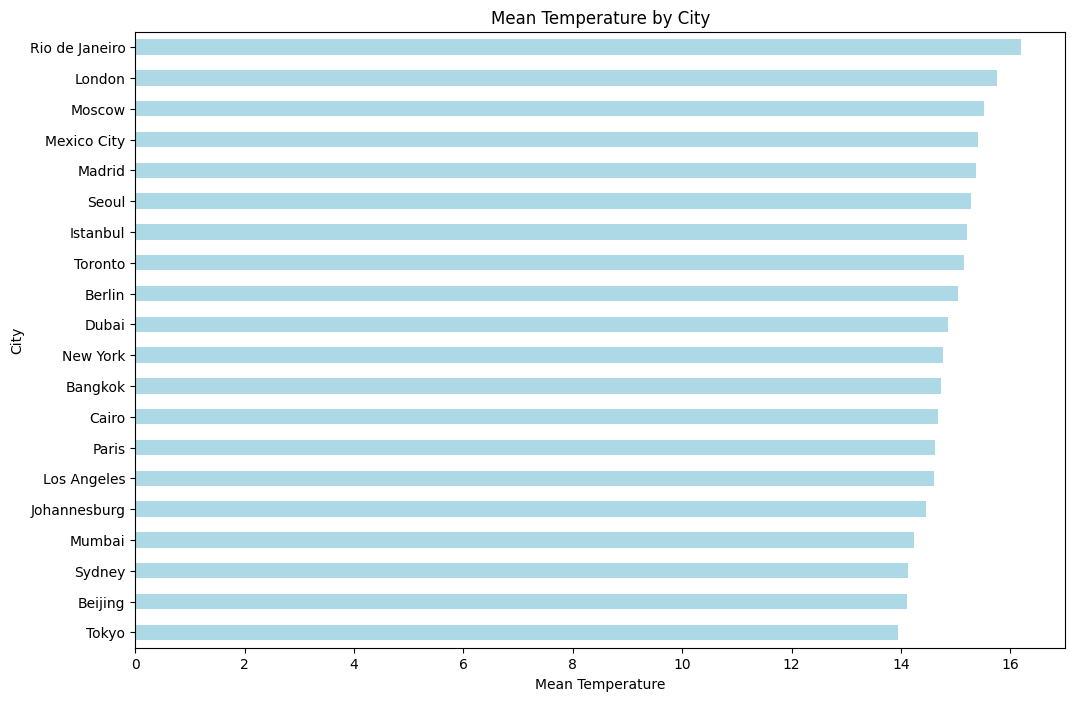

In [32]:
# Example: Mean Temperature by City 

plt.figure(figsize=(12, 8))
mean_temp_by_city = data.groupby('City')['Temperature'].mean().sort_values()
mean_temp_by_city.plot(kind='barh', color='lightblue')
plt.title('Mean Temperature by City')
plt.xlabel('Mean Temperature')
plt.ylabel('City')
plt.show()


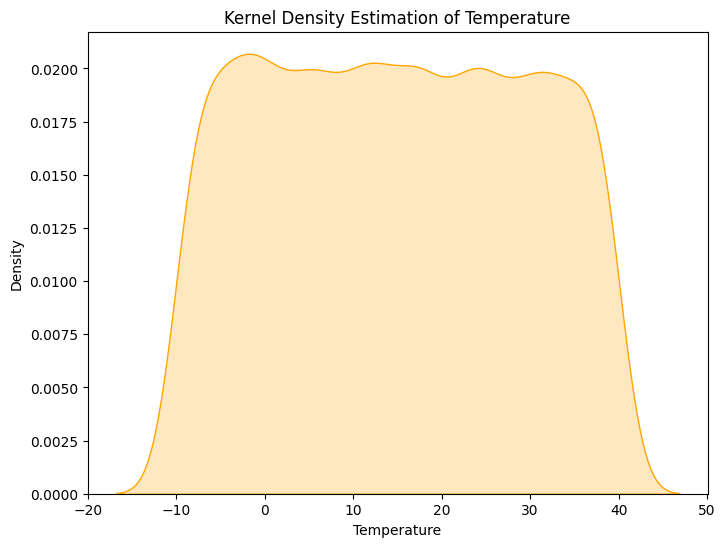

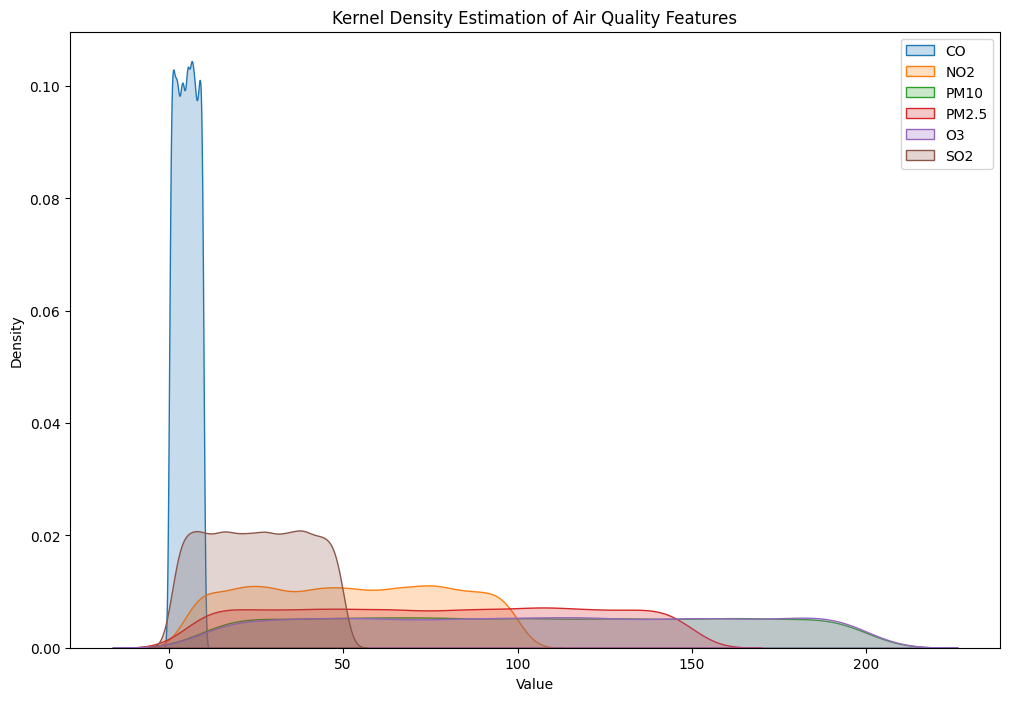

In [33]:
# KDE Plot for Temperature

plt.figure(figsize=(8, 6))
sns.kdeplot(data['Temperature'], fill=True, color='orange')
plt.title('Kernel Density Estimation of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.show()

# KDE Plot for Air Quality Features

plt.figure(figsize=(12, 8))
for feature in air_quality_features:
    sns.kdeplot(data[feature], fill=True, label=feature)
plt.title('Kernel Density Estimation of Air Quality Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## feature selection

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection using Random Forest or SelectKBest

X = data_transformed[air_quality_features]
y = data_transformed[target_variable]

model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:\n", feature_importances)

# Select top features (e.g., using SelectKBest)

selector = SelectKBest(f_regression, k='all')
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features: ", selected_features)


Feature Importances:
 O3       0.169409
PM10     0.169300
PM2.5    0.167352
SO2      0.165822
NO2      0.165741
CO       0.162376
dtype: float64
Selected Features:  Index(['CO', 'NO2', 'PM10', 'PM2.5', 'O3', 'SO2'], dtype='object')


## data splitting

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


## model building

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=500)
}

# Train and evaluate each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse}, R2 = {r2}")


Linear Regression: MSE = 1.022475343303623, R2 = -0.003588085728035706
Random Forest: MSE = 1.0709119959274822, R2 = -0.05113001209742074
SVR: MSE = 1.069434891938039, R2 = -0.049680193307271026
Gradient Boosting: MSE = 1.0376980841864516, R2 = -0.018529630756173532
MLP Regressor: MSE = 1.0580460280102533, R2 = -0.03850170551022125


## model evaluation

In [37]:
# Best model evaluation

best_model = RandomForestRegressor()  # Example; choose based on performance
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model - MSE: {mse}, R2: {r2}")

# Interpretation

### Analyze which air quality features most significantly affect temperature

print("Air Quality Features Importance:\n", pd.Series(best_model.feature_importances_, index=selected_features).sort_values(ascending=False))


Best Model - MSE: 1.0755628823153047, R2: -0.055694986888707554
Air Quality Features Importance:
 PM10     0.170067
NO2      0.169168
O3       0.168801
PM2.5    0.167514
SO2      0.163309
CO       0.161140
dtype: float64


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model

model = RandomForestRegressor()

# Define the hyperparameters grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data

grid_search.fit(X_train, y_train)

# Best hyperparameters

print("Best Hyperparameters:", grid_search.best_params_)

# Best model

best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set

y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Random Forest - MSE: {mse}, R2: {r2}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest - MSE: 1.0318177157584678, R2: -0.012757885028840787


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model

model = GradientBoostingRegressor()

# Define the hyperparameters grid

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data

grid_search.fit(X_train, y_train)

# Best hyperparameters

print("Best Hyperparameters:", grid_search.best_params_)

# Best model

best_gb_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set

y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Gradient Boosting - MSE: {mse}, R2: {r2}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Gradient Boosting - MSE: 1.0236440175486072, R2: -0.004735172116030029


## Conclusion

Interpret the model's findings. Discuss how different air quality parameters impact temperature and identify any limitations or areas for improvement.

## Future Work

#Explore other machine learning models or even deep learning techniques to improve prediction accuracy.
#Periodically update the model with new data to ensure it remains relevant.
#Consider incorporating additional environmental or meteorological factors to enhance predictive power.

 This approach will allow  to understand the relationship between air quality and temperature and build predictive models based on your dataset.